# Some useful utils for debugging the training and models

In [1]:
import torch
import os
import sys
import cv2
import numpy as np
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data_load import ToTensor, ColorJitter, Rescale, RandomCrop, RandomHorizontalFlip
import torchvision.transforms.functional as F
from torchvision.transforms import Compose
import matplotlib.pyplot as plt

In [2]:
def fix_dataparallel_state_dict():
    checkpoint = torch.load(
        '../saved_models/resnet34-yanjiali-010319-epoch-129.pt', map_location='cpu')

    state_dict = checkpoint['model']

    print(state_dict.keys())

    from collections import OrderedDict
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k[7:] # remove 'module.' of dataparallel
        new_state_dict[name]=v

    print(new_state_dict.keys())

    torch.save({
        'epoch':
        checkpoint['epoch'],
        'model':
        new_state_dict,
        'optimizer':
        checkpoint['optimizer'],
        'scheduler':
        checkpoint['scheduler'],
        'loss_logger':
        checkpoint['loss_logger'],
        'acc_logger':
        checkpoint['acc_logger'],
    }, '../saved_models/resnet34-yanjiali-010319-epoch-129.pt')

# Visualize Transform - Rescale, HFlip, RandomCrop, ColorJitter

In [3]:
def visualize_transform(image):
    sample = {
        'image': image,
        'annotation': 'cat',
    }
    transform = Compose([
        Rescale(256),
        RandomHorizontalFlip(0.5),
        RandomCrop(224),
        ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0),
    ])
    plt.figure(figsize=(20,10))
    for i in range(1, 11):
        transformed = transform(sample)
        transformed_image = np.asarray(transformed['image'])
        plt.subplot(2, 5, i)
        plt.imshow(transformed_image)

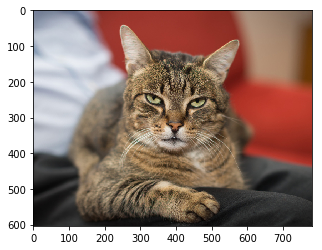

In [4]:
image_path = '../test_images/cat1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(image)

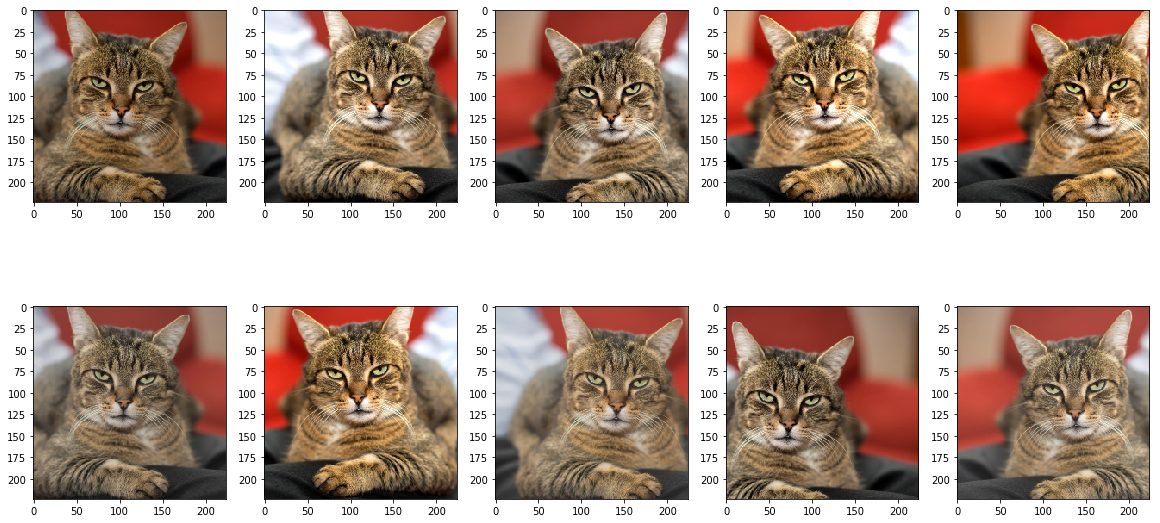

In [5]:
visualize_transform(image)

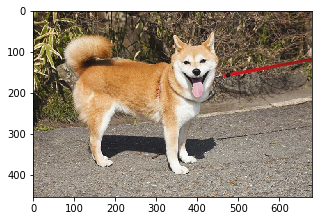

In [6]:
image_path = '../test_images/dog1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(image)

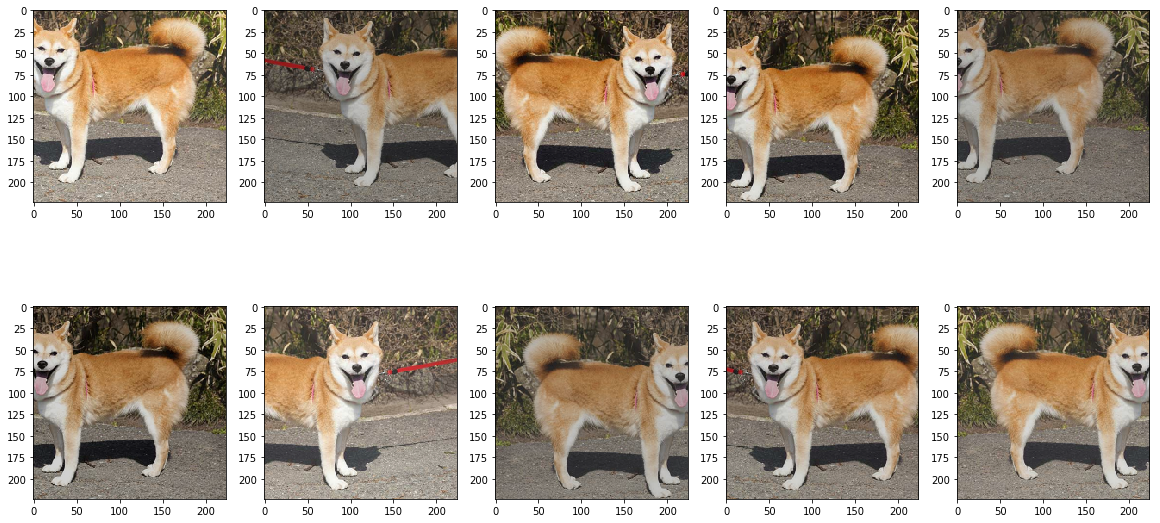

In [7]:
visualize_transform(image)

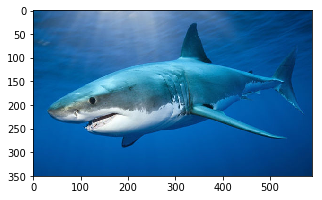

In [8]:
image_path = '../test_images/shark1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(image)

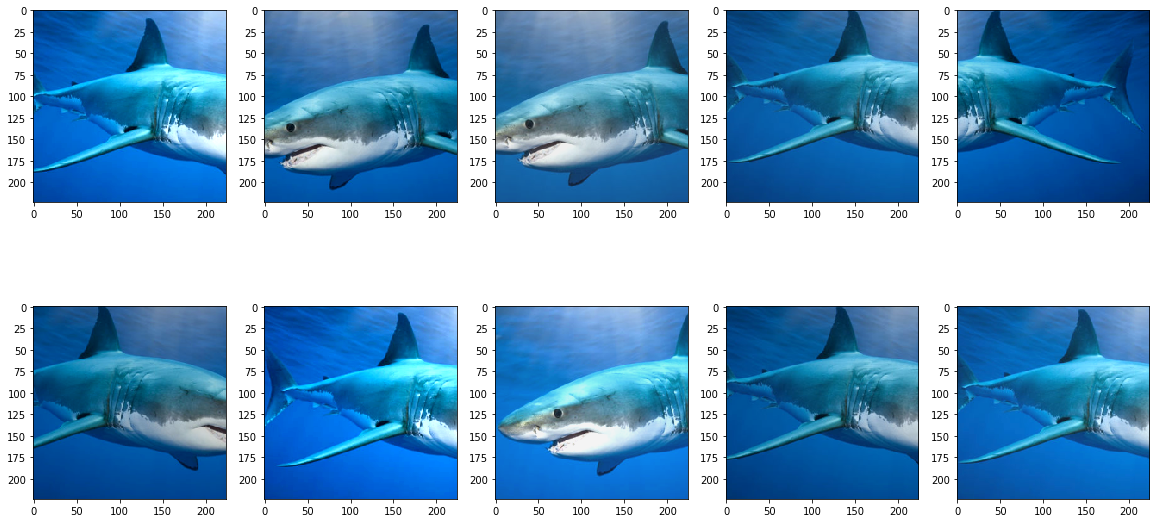

In [9]:
visualize_transform(image)

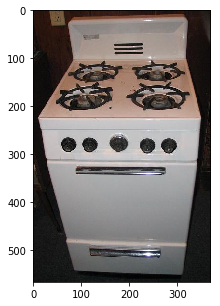

In [10]:
image_path = '../test_images/stove1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(image)

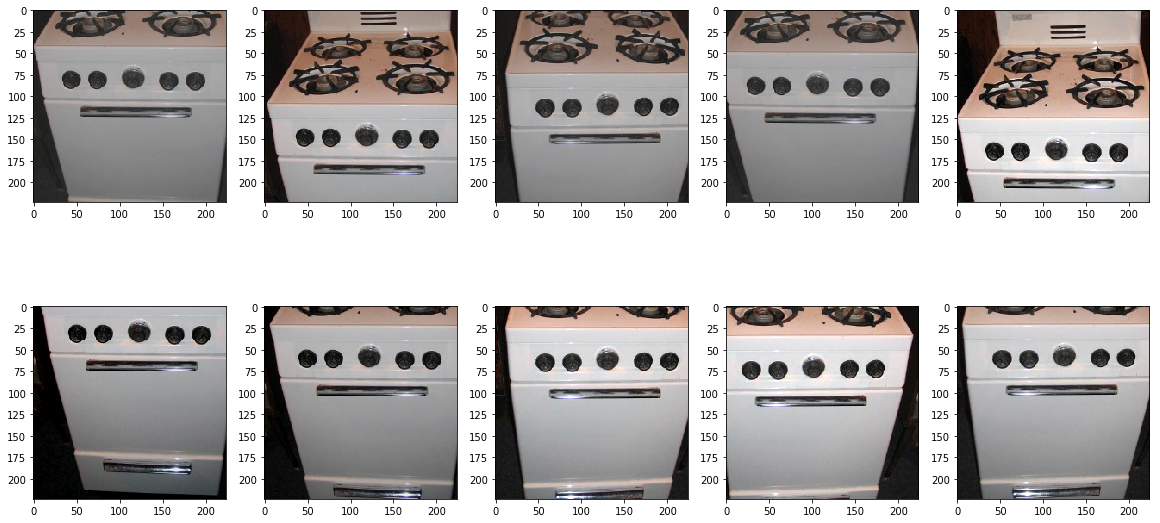

In [11]:
visualize_transform(image)